# Assignment03 
* 20165396 박범진


## 1. Input points

Plot a set of points that are loaded from data.csv in black color

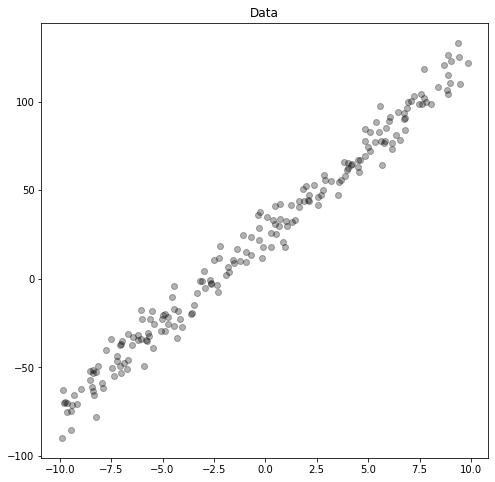

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Path 설정 및 파일 불러오기
path = 'data.csv'
data = np.genfromtxt(path, delimiter=',')

# X, Y 나누기
x_data = data[:,0]
y_data = data[:,1]

# Plot
plt.figure(figsize=(8,8))
plt.scatter(x_data, y_data, alpha=0.3, color='black')
plt.title('Data')
plt.show()
